#### Written by Gabriel Borges Pinheiro
[Github](github.com/gabrielbopi)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def db(X):
    return 10 * np.log10(X)

In [3]:
def inv_db(X):
    return 10**(X/10)

In [4]:
def randn_nlos(M, p, sigma):
    """
    Computes the NLoS
    p: UE's signal power, sigma: array of interferences' power
    """
    #M: Number of antennas at array
    #g: function that depends of the angle between the BS's and UE's antennas. In this algorithm is just a random number

    sigma = np.array(sigma)
    g = np.random.randn(M) + 1j*np.random.randn(M)
    h = (np.sqrt(sigma))*g
    #h0: Channel response
    a = (p*np.abs(h[0])**2)/(p*np.abs(h[1])**2 + sigma[2])
    return np.log2(1+a)


In [5]:
def SE_mean(n, M, p, sigma):
    samples_SE = []
    for i in range(n):
        samples_SE = np.append(samples_SE, randn_nlos(M, p, sigma))
    return np.mean(samples_SE)

In [6]:
n = 10
p = 10e-3
M = 3
sigma = [1, 0.0001, 1]

In [7]:
p_axis = np.logspace(-5, 1, num = 12)
SE_p = []
for p in p_axis:
    SE_p = np.append(SE_p, SE_mean(n, M, p, sigma)) 

Text(0.5, 0, 'Signal power [dB]')

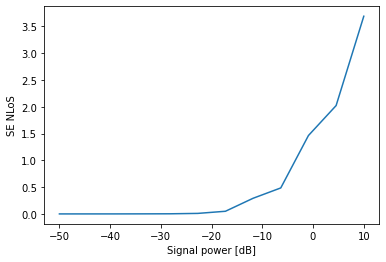

In [8]:
fig, ax = plt.subplots()
ax.plot(db(p_axis),SE_p)
ax.set_ylabel("SE NLoS")
ax.set_xlabel("Signal power [dB]")

In [9]:
sigma1_axis = np.logspace(-5, 1, num = 12)
SE_sigma1 = []
for sigma1 in sigma1_axis:
    SE_sigma1 = np.append(SE_sigma1, SE_mean(n, M, p, sigma)) 

Text(0.5, 0, 'Noise power [dB]')

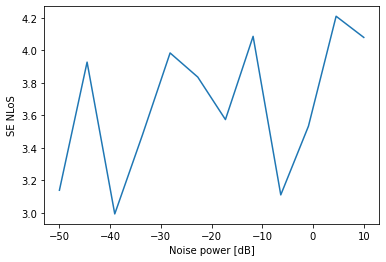

In [13]:
fig, ax = plt.subplots()
ax.plot(db(sigma1_axis),SE_sigma1)
ax.set_ylabel("SE NLoS")
ax.set_xlabel("Noise power [dB]")